In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pystan
import numpy as np
%matplotlib inline

In [2]:
plt.style.use("ggplot")

In [4]:
df=pd.read_excel("./data/data.xlsx")

In [5]:
df.head(3)

,0
0,3.896195
1,5.865766
2,5.860887


(array([ 1.,  1.,  5., 12., 10., 18., 16.,  8.,  5.,  4.]),
 array([2.29193477, 2.77510498, 3.25827519, 3.74144541, 4.22461562,
        4.70778584, 5.19095605, 5.67412627, 6.15729648, 6.64046669,
        7.12363691]),
 <a list of 10 Patch objects>)

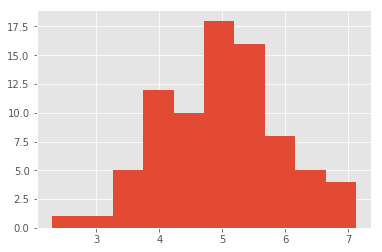

In [6]:
plt.hist(df[0])

In [16]:
stan_model="""
data {
  int N;
  real Y[N];
}

parameters {
  real mu;
  real<lower=0> sigma;
}

model {
  for (i in 1:N){
    Y[i]~normal(mu,sigma);
  }  
}
"""

In [17]:
sm=pystan.StanModel(model_code=stan_model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_1e1c509317029c235636cafb45fe4d84 NOW.


In [19]:
stan_data={"N":df.shape[0],"Y":df[0]}

In [21]:
fit=sm.sampling(data=stan_data,iter=2000,chains=3,warmup=500,seed=123)

In [22]:
fit

Inference for Stan model: anon_model_1e1c509317029c235636cafb45fe4d84.
3 chains, each with iter=2000; warmup=500; thin=1; 
post-warmup draws per chain=1500, total post-warmup draws=4500.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu      4.97  1.8e-3   0.11   4.76    4.9   4.98   5.05   5.18   3520    1.0
sigma   0.97  1.3e-3   0.08   0.83   0.92   0.97   1.02   1.14   3827    1.0
lp__  -37.07    0.02   0.99 -39.79 -37.48 -36.76 -36.36  -36.1   2103    1.0

Samples were drawn using NUTS at Mon Apr  1 20:49:30 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

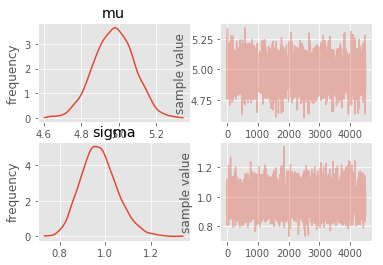

In [24]:
fig=fit.plot()